In [7]:
import pandas as pd
#import numpy as np
#import nltk
#import re
#from nltk.stem.wordnet import WordNetLemmatizer
#import spacy
#from nltk.corpus import stopwords
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [29]:
# Loading data
df = pd.read_csv('lyrics.csv', index_col=0)
print("Number of songs before cleaning:", len(df))

data = df.dropna()
data = data.drop(data[data0.genre == 'Not Available'].index)
data = data.drop(data[data.genre == 'Other'].index)
print("Number of songs after cleaning:", len(data))

Number of songs before cleaning: 362237
Number of songs after cleaning: 237426


genre
Rock          109235
Pop            40466
Hip-Hop        24850
Metal          23759
Country        14387
Jazz            7970
Electronic      7966
R&B             3401
Indie           3149
Folk            2243
dtype: int32


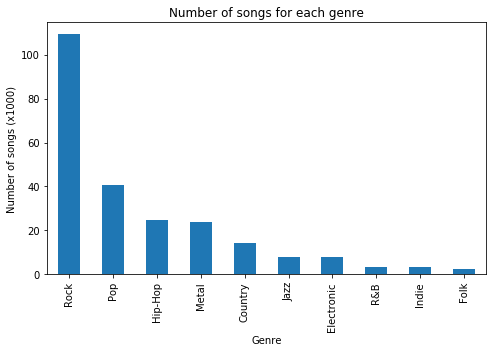

In [41]:
counts = data.groupby('genre').size().sort_values(ascending=False)/1000
print((counts*1000).astype(int))

ax = counts.plot.bar(title="Number of songs for each genre", figsize=(7,5))
ax.set_xlabel('Genre')
ax.set_ylabel('Number of songs (x1000)')

plt.tight_layout()
#plt.savefig('barplot.pdf')

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data.lyrics, data.genre, test_size=0.2, random_state=109)

model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(X_train, y_train)

labels = model.predict(X_test)

In [43]:
print("Accuracy:", metrics.accuracy_score(y_test, labels))
print("Recall:", metrics.recall_score(y_test, labels, average=None))
print("F1-score:", metrics.f1_score(y_test, labels, average=None))

Accuracy: 0.5051594154066462
Recall: [0.         0.0018622  0.04273504 0.32906837 0.         0.
 0.05440034 0.12650905 0.         0.96027366]
F1-score: [0.         0.00371747 0.08163265 0.48461652 0.         0.
 0.1026149  0.19467828 0.         0.64856373]


C:\Users\Hp\WPy64-3720\python-3.7.2.amd64\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
Accuracy: 0.5051594154066462
Recall:  [0 | 0.0019 | 0.0427 | 0.3291 | 0 | 0 | 0.0544 | 0.1265 | 0 | 0.9603]
F1-score:[0 | 0.0037 | 0.0816 | 0.4846 | 0 | 0 | 0.1026 | 0.1947 | 0 | 0.6486]

In [49]:
print(classification_report(y_test, labels))

              precision    recall  f1-score   support

     Country       0.00      0.00      0.00      2870
  Electronic       1.00      0.00      0.00      1611
        Folk       0.91      0.04      0.08       468
     Hip-Hop       0.92      0.33      0.48      5002
       Indie       0.00      0.00      0.00       643
        Jazz       0.00      0.00      0.00      1580
       Metal       0.90      0.05      0.10      4761
         Pop       0.42      0.13      0.19      7952
         R&B       0.00      0.00      0.00       674
        Rock       0.49      0.96      0.65     21925

   micro avg       0.51      0.51      0.51     47486
   macro avg       0.46      0.15      0.15     47486
weighted avg       0.53      0.51      0.39     47486



In [10]:
cm = confusion_matrix(y_test, labels)

In [ ]:
            Coun , Elec , Folk , Hip-H, Indie, Jazz , Metal, Pop  , R&B  , Rock
Country    [    0,     0,     0,     1,     0,     0,     0,     8,     0,  2861]
Electronic [    0,     3,     0,    20,     0,     0,     3,    55,     0,  1530]
Folk       [    0,     0,    20,     0,     0,     0,     0,    44,     0,   404]
Hip-Hop    [    0,     0,     0,  1646,     0,     0,     1,   208,     0,  3147]
Indie      [    0,     0,     0,     2,     0,     0,     0,    28,     0,   613]
Jazz       [    0,     0,     0,     4,     0,     0,     0,    89,     0,  1487]
Metal      [    0,     0,     0,    31,     0,     0,   259,   124,     0,  4347]
Pop        [    0,     0,     0,    46,     0,     0,     8,  1006,     0,  6892]
R&B        [    0,     0,     0,     4,     0,     0,     0,     5,     0,   665]
Rock       [    0,     0,     2,    37,     0,     0,    16,   816,     0, 21054]

In [17]:
data1 = data[(data.genre == "Hip-Hop") | (data.genre == "Metal") | (data.genre == "Pop") | (data.genre == "Rock")]

data1.groupby('genre').size()

genre
Hip-Hop     24850
Metal       23759
Pop         40466
Rock       109235
dtype: int64

In [22]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(data1.lyrics, data1.genre, test_size=0.2, random_state=109)

model1 = make_pipeline(TfidfVectorizer(), MultinomialNB())
model1.fit(X_train1, y_train1)

labels1 = model1.predict(X_test1)

In [53]:
print("Accuracy:", round(metrics.accuracy_score(y_test1, labels1),4))
print("Recall:", metrics.recall_score(y_test1, labels1, average=None))
print("F1-score:", metrics.f1_score(y_test1, labels1, average=None))

Accuracy: 0.604
Recall: [0.33835812 0.06045924 0.12532094 0.96128648]
F1-score: [0.49760336 0.11332675 0.1983935  0.73299563]


In [24]:
cm1 = confusion_matrix(y_test1, labels1)
cm1

array([[ 1661,     0,   227,  3021],
       [   26,   287,   114,  4320],
       [   47,     7,  1025,  7100],
       [   33,    24,   788, 20982]], dtype=int64)

In [48]:
print(classification_report(y_test1, labels1))

              precision    recall  f1-score   support

     Hip-Hop       0.94      0.34      0.50      4909
       Metal       0.90      0.06      0.11      4747
         Pop       0.48      0.13      0.20      8179
        Rock       0.59      0.96      0.73     21827

   micro avg       0.60      0.60      0.60     39662
   macro avg       0.73      0.37      0.39     39662
weighted avg       0.65      0.60      0.52     39662

